<a href="https://colab.research.google.com/github/Rodrigo-O-Santos/Portfolio/blob/master/Airbnb_Hong_Kong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Hong Kong

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

Em pesquisa ao site [GPC - Global Property Guide](https://www.globalpropertyguide.com/most-expensive-cities), podemos verificar que Hong Kong possui o metro quadrado mais caro do mundo seguido de Londres (aluguel/mês):

Hong Kong - $ 7,267

Londres - $ 6,388
<center><img src = "https://seeklogo.com/images/F/flag-map-of-hong-kong-logo-C9ADBD56BD-seeklogo.com.png" height = "100px"></center>

**Neste *notebook*, iremos analisar os dados do Airbnb, referentes à cidade de Honk Kong, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados
Todos os dados obtidos para esta análise foram obtidos do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise, foi extraído um arquivo do site citado:
* `listings.csv` - *Summary information and metrics for listings in Hong Kong (good for visualisations).*



In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import _random

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/china/hk/hong-kong/2020-04-29/visualisations/listings.csv")

## Análise dos Dados
 

O objetivo é mostrar como os dados extraídos anteriormente estão estruturados. 

**Hong Kong** possui aproxidamente 7.5 milhões de habitantes (dados de 2018) e possui um forte turismo que representa cerca de 5% PIB (14º destino mais popular). Em 2016 foram 26.6 milhões de visitantes contribuindo com $32.9 bilhões na economia. Porém, perceba que temos poucos bairros oferecendo o serviço de hospedagem pelo Airbnb: apenas 18.

Como comparação, o Rio de Janeiro que é a cidade que mais recebe turista no Brasil, possui aproximadamente 6.6 milhões de habitantes (dados de 2015) e recebeu em 2016, aproxidamente, 6.5 milhoes de turistas, possui 51* bairros com o serviço de hospedagem pelo Airbnb.

***Dados retirados do mesmo site do Airbnb, referente a cidade do Rio de Janeiro**

**Dicionário das variáveis**

* `id` - número gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número que identifica o proprietário do imóvel
* `host_name` - nome do proprietário
* `neighbourhood_group` - coluna não possui nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada de latitude da propriedade
* `longitude` - coordenada de longitude da propriedade
* `room_type` - tipo de imóvel ofertado (quarto, apt inteiro, casa)
*	`price` - preço cobrado pela diária
*	`minimum_nights` - mínimo de noites necessárias para alugar o imóvel
*	`number_of_reviews` - números de análises que a propriedade possui
*	`last_review` - data da última análise feita
*	`reviews_per_month` - análises recebidas por mês
*	`calculated_host_listings_count` - número de imóveis do mesmo proprietário
*	`availability_365` - número de dias disponíveis (considerando 365 dias)


Antes de iniciar qualquer análise, vamos analisar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

Na sequência, vamos verificar quais os bairros de Hong Kong possuem imóveis disponíveis para aluguel pelo Airbnb.

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,69074,Beautiful oasis of plants & art @ best location,160139,Amy,NaN,Central & Western,22.28352,114.15018,Entire home/apt,1395,3,134,2020-03-24,1.20,1,138
1,75083,SoHo off Hollywood Road 3B,304876,Brend,NaN,Central & Western,22.28398,114.14839,Entire home/apt,783,14,228,2017-08-14,2.04,13,335
2,103760,Central Centre 5 min walk to/from Central MTR,304876,Brend,NaN,Central & Western,22.28407,114.15570,Entire home/apt,845,2,270,2020-04-08,2.50,13,360
3,132773,Fabulous 2 Bdrm Aprt Open kitchen,304876,Brend,NaN,Central & Western,22.28868,114.14494,Entire home/apt,1046,2,304,2020-04-05,2.84,13,348
4,133390,"Soho, Hong Kong 1 bedroom flat",654642,Robin,NaN,Central & Western,22.28343,114.15539,Entire home/apt,930,2,27,2015-06-30,0.25,1,87


In [ ]:
# mostrar os bairros com imóveis para alugar no Airbnb
df['neighbourhood'].unique()

array(['Central & Western', 'Yau Tsim Mong', 'Wan Chai', 'Yuen Long',
       'Southern', 'Eastern', 'Islands', 'Kowloon City', 'Kwai Tsing',
       'North', 'Sha Tin', 'Sham Shui Po', 'Tuen Mun', 'Sai Kung',
       'Wong Tai Sin', 'Tai Po', 'Tsuen Wan', 'Kwun Tong'], dtype=object)

In [ ]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos verificar quais e quantos são os tipos de dados diferentes que teremos para análise neste conjunto de dados.
Vamos ver também o tipo de cada coluna.



In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 11535
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Para que não tenhamos uma análise influenciada de forma negativa por um número excessivo de valores ausentes no *dataset*.
Sendo assim, é importante detectarmos se existe e qual o tamanho dos valores ausentes em nosso conjunto de dados.

Podemos perceber que:
* a coluna **neighbourhood_group** possui 100% dos dados nulos;
* as colunas **reviews_per_month** e **last_review** possuem cerca de 35% dos dados nulos;
* a coluna **name** possui menos de 1% dos dados nulos. 

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.374339
last_review                       0.374339
name                              0.000694
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Iremos verificar como está a distribuição das variáveis numéricas plotando um histograma.

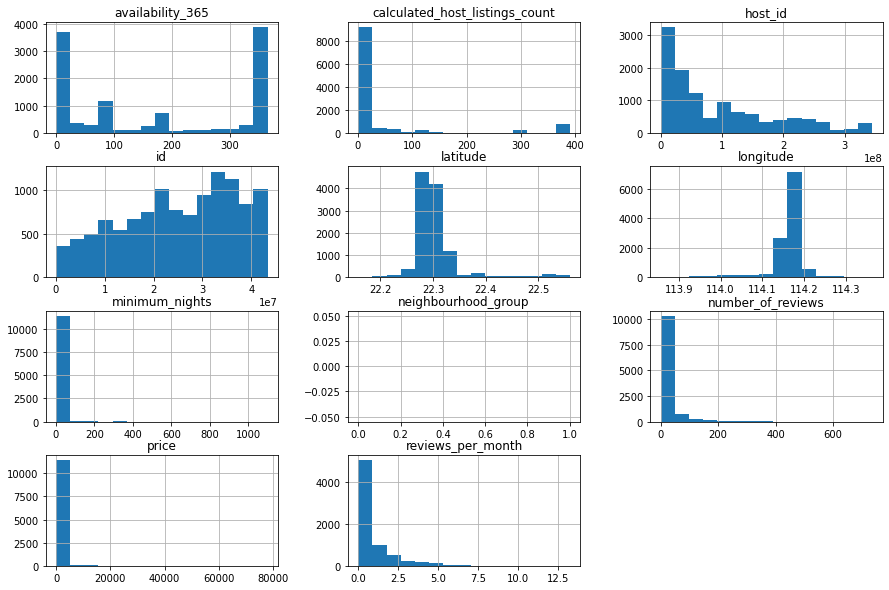

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**
Podemos perceber pelos histogramas plotados que existem indícios de *outliers*.
Veja por exemplo, a variável **minimum_nights**: existem imóveis com a necessidade de reserva de no mínimo 1000 dias, o que corresponde a quase 3 anos.

Veja ainda que alguns gráficos como **price**, **reviews_per_month**, **number_of_reviews** também distorcem o gráfico, não seguindo uma distribuição "comum".

* Para estudarmos os *outliers* iremos verificar o resumo estatístico e *plotar* um gráfico do tipo boxplot das variáveis numéricas.

In [ ]:
# Ver o resumo estatístico das variáveis numéricas
df[['availability_365', 'calculated_host_listings_count', 'minimum_nights', 'number_of_reviews', 'price']].describe()

,availability_365,calculated_host_listings_count,minimum_nights,number_of_reviews,price
count,11535.000000,11535.000000,11535.000000,11535.000000,11535.000000
mean,172.731253,44.745644,9.456003,17.735154,769.382315
std,156.453435,102.228143,27.858655,41.086132,2407.634235
min,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,295.000000
50%,141.000000,4.000000,2.000000,2.000000,465.000000
75%,364.000000,18.000000,7.000000,14.000000,798.000000
max,365.000000,390.000000,1100.000000,736.000000,78001.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A quantidade mínima de noite (`minimum_nights`) está muito acima de um número normal, chegando a 1100 dias (aprox 3 anos);
* O preço possui um valor médio de 748, com 75% dos imóveis até 800. Porém seu valor máximo chega a 77,998;
* O número de imóveis do mesmo dono chega a 390, bem acima dos 18 que representam 75% em nosso *dataset*.

Estes números excessivamente fora do comum representam `outliers` e devem ser retirados da nossa análise para não distorcer os dados estudados.

### Boxplot para *minimum_nights*

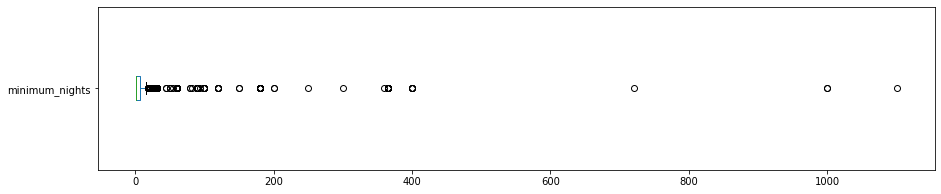

minimum_nights com valores acima de 30 dias:
284 entradas
2.4621%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind = 'box', vert = False, figsize = (15, 3));
plt.show()

# ver quantidade de valores acima de 30 dias
print("minimum_nights com valores acima de 30 dias:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0]) * 100))

### Boxplot para *price*

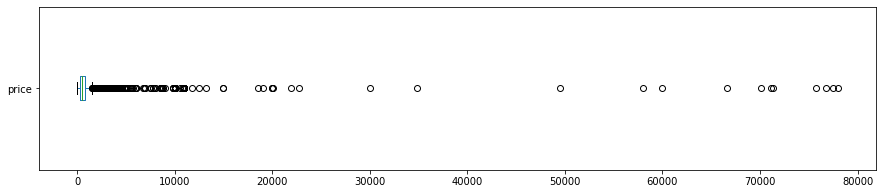

price com valores acima de 2000:
353 entradas
3.0603%


In [ ]:
# price
df.price.plot(kind = 'box', vert = False, figsize = (15, 3));
plt.show()

# ver quantidade de valores acima de 2000
print("price com valores acima de 2000:")
print("{} entradas".format(len(df[df.price > 2000])))
print("{:.4f}%".format((len(df[df.price > 2000]) / df.shape[0]) * 100))

###Boxplot para *calculated_host_listings_count*

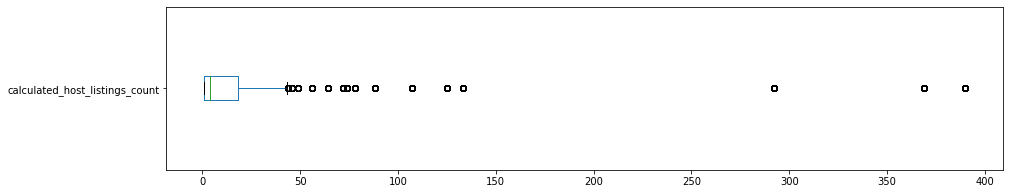

calculated_host_listings_count acima de 100:
1416 entradas
12.2757%


In [ ]:
# calculated_host_listings_count
df.calculated_host_listings_count.plot(kind = 'box', vert = False, figsize = (15,3));
plt.show()

# Ver quantidade de valores acima de 100
print("calculated_host_listings_count acima de 100:")
print("{} entradas".format(len(df[df.calculated_host_listings_count > 100])))
print("{:.4f}%".format((len(df[df.calculated_host_listings_count > 100]) / df.shape[0]) * 100))

### Histogramas sem outliers
Uma vez identificados *outliers*, vamos limpar nossa *DataFrame*, retirando os dados que não nos interessa, e plotar novo histograma. 

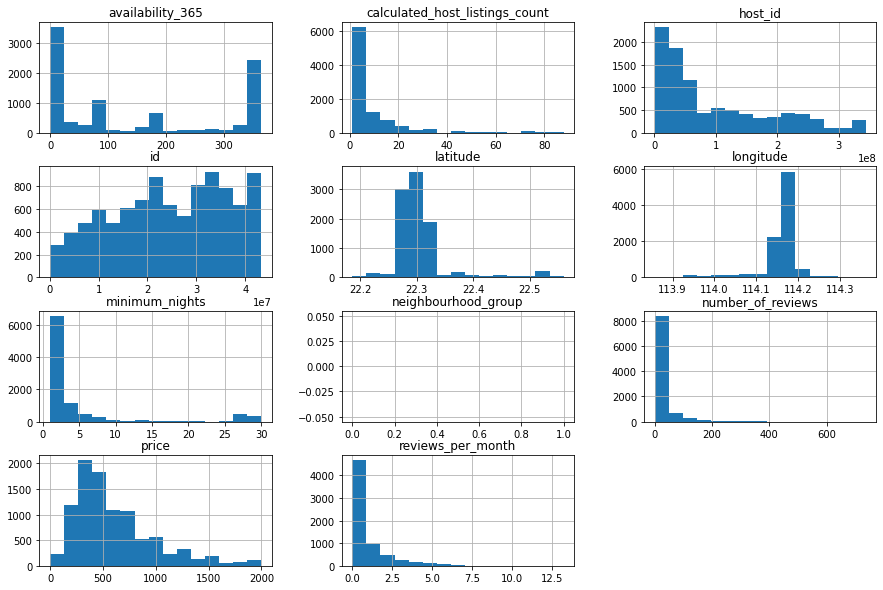

In [ ]:
# Remover os *outliers* em um novo *DataFrame*
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 2000].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 100].index, axis = 0, inplace = True)

# Remover `neighbourhood_group`pois está vazio


# Plotar os histogramas das variáveis numéricas
df_clean.hist(bins = 15, figsize = (15,10));

Podemos ver nos gráficos colocados lado a lado, como limpar os outliers deixando apenas os dados que fazem sentido, faz diferença na análise dos mesmos.


<center><img src="https://github.com/Rodrigo-O-Santos/Images/blob/master/Projeto%20Airbnb_Hong%20Kong_compara%C3%A7%C3%A3o%20entre%20graficos.png?raw=true"></center>



### **Q4. Qual a correlação existente entre as variáveis**
Vamos verificar quais dados possuem correlação, ou seja, ver se temos 2 variáveis com comportamentos relacionados entre si.
Para isso vamos:
* Criar uma matriz de correlação;
* Criar um *heatmap*, usando a biblioteca `seaborn`.

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

# mostrar a matriz de correlação


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.065638,0.008932,-0.015237,-0.174369,-0.095783
minimum_nights,-0.065638,1.000000,-0.095087,-0.093764,0.248642,0.180861
number_of_reviews,0.008932,-0.095087,1.000000,0.818996,0.017749,0.084604
reviews_per_month,-0.015237,-0.093764,0.818996,1.000000,0.019452,0.073150
calculated_host_listings_count,-0.174369,0.248642,0.017749,0.019452,1.000000,0.361375
availability_365,-0.095783,0.180861,0.084604,0.073150,0.361375,1.000000


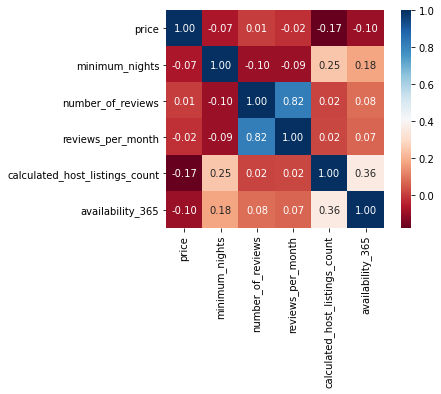

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap = 'RdBu', fmt = '.2f', square = True, linecolor = 'White', annot = True);

Podemos ver com o *heatmap* que a maior correlação existente é número de reviews com reviews por mês.
Esta é uma relação até óbvia já que, quanto maior o número de reviews por mês, maior será o número dos mesmos.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**
Vamos verificar qual tipo de imóvel é mais alugado pelo Airbnb em Hong Kong: apartamento inteiro, quarto inteiro, casa dividida...

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    4540
Private room       4351
Shared room         475
Hotel room          249
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.472179
Private room       0.452522
Shared room        0.049402
Hotel room         0.025897
Name: room_type, dtype: float64

Podemos ver que o imóvel inteiro e quarto privado representam mais de 90% dos imóveis disponíveis em Hong Kong.

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending = False)[:10]

neighbourhood
Southern             811.289157
Central & Western    739.624145
Kwai Tsing           723.648649
Islands              715.889145
Tsuen Wan            653.980769
Wan Chai             644.390742
Wong Tai Sin         603.000000
Kowloon City         594.479876
Eastern              594.242038
Sai Kung             587.881119
Name: price, dtype: float64

Podemos verificar acima que Kowloon City, um dos bairros mais populosos, baratos e perigosos possui os mais caros imóvies para aluguel no Airbnb.

Vamos analisar quantas entradas temos para este bairro.

In [ ]:
print(df[df.neighbourhood == 'Kowloon City'].shape)
df[df.neighbourhood == 'Kowloon City']

print('Média de listagens por Bairro:', df_clean.neighbourhood.value_counts().mean())
df_clean.neighbourhood.value_counts()

(461, 16)
Média de listagens por Bairro: 534.1666666666666


Yau Tsim Mong        3823
Central & Western    2046
Wan Chai             1469
Islands               433
Kowloon City          323
Eastern               314
Sham Shui Po          214
Yuen Long             208
North                 159
Sai Kung              143
Sha Tin               118
Southern               83
Kwun Tong              64
Tuen Mun               54
Tsuen Wan              52
Tai Po                 51
Kwai Tsing             37
Wong Tai Sin           24
Name: neighbourhood, dtype: int64

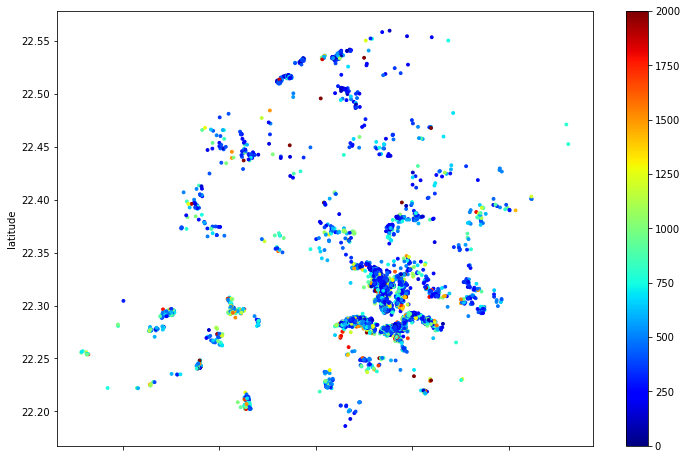

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind = "scatter", x = 'longitude', y = 'latitude', alpha = 10, c = df_clean['price'], s = 8, cmap = plt.get_cmap('jet'), figsize = (12, 8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean.groupby(['neighbourhood']).minimum_nights.mean().sort_values(ascending = False)

neighbourhood
Wan Chai             6.959837
Eastern              6.764331
Wong Tai Sin         6.375000
Kwai Tsing           6.351351
Tuen Mun             6.296296
Sham Shui Po         5.303738
Tsuen Wan            5.192308
Sha Tin              5.033898
Kwun Tong            4.875000
Islands              4.833718
Kowloon City         4.637771
Central & Western    4.557674
Yau Tsim Mong        3.874183
Sai Kung             3.874126
Southern             3.554217
Tai Po               3.313725
Yuen Long            2.870192
North                1.861635
Name: minimum_nights, dtype: float64

## Conclusões


Após breve análise, podemos ver que existem muitos *outliers* no conjunto de dados, o que pode alterar significativamente nossos estudos.
Podemos notar que Hong Kong possui poucos imóveis disponíveis e que, os mesmos estão concentrados em uma determinada região (principalmente em 3 bairros), onde também estão os mais caros e exigem menor número de noites mínimas para reserva.